**Q1. What is the mathematical formula for a linear SVM?**

y_i (w^T * x_i + b) ≥ 1

**Q2. What is the objective function of a linear SVM?**

The objective function of a linear SVM is to maximize the margin between the separating hyperplane and the closest data points from each class

**Q3. What is the kernel trick in SVM?**

The kernel trick is a technique used in Support Vector Machines (SVMs) to handle non-linear data. It allows SVMs to classify data by mapping it to a higher-dimensional space where it becomes linearly separable

How it works
- The kernel trick uses a kernel function to map the data to a higher-dimensional space.
- The SVM algorithm can then find the best decision boundary in this new space.
- The kernel function is used again to project new data points into the higher- dimensional space.
- The decision boundary is used to make predictions.

**Q4. What is the role of support vectors in SVM Explain with example**

Support Vectors play a critical role in the functioning of Support Vector Machines (SVMs). These are the data points that are closest to the decision boundary (hyperplane) and directly influence its position and orientation. The SVM algorithm uses these points to maximize the margin (distance between the hyperplane and the nearest points from each class).

Role of Support Vectors
- Defining the Decision Boundary: Support vectors are the data points that are closest to the hyperplane. They determine the optimal position of the hyperplane by ensuring the margin between the classes is maximized.
- Reducing Complexity: Once the SVM is trained, only the support vectors are needed to define the hyperplane, making the model efficient. Other points in the dataset do not affect the decision boundary.
- Handling Overlap: In cases where classes overlap, support vectors allow a soft margin (using slack variables) to tolerate some misclassificattions and create a robust decision boundary.

Example:
Consider a binary classification problem with two classes:
- Class A: Red points
- Class B: Blue points

Scenario:
- Suppose the data points from Class A and Class B are plotted on a 2D plane.
- The goal is to separate these classes with a straight line (in 2D) or hyperplane (in higher dimensions).

Support Vectors:
- Among all the points, the closest points from each class to the decision boundary (hyperplane) are identified as support vectors.
- The distance between these support vectors and the hyperplane forms the margin.
- The SVM algorithm adjusts the hyperplane to ensure this margin is as large as possible.

**Q5. Illustrate with examples and graphs of Hyperplane, Marginal plane, Soft margin and Hard margin in
SVM?**

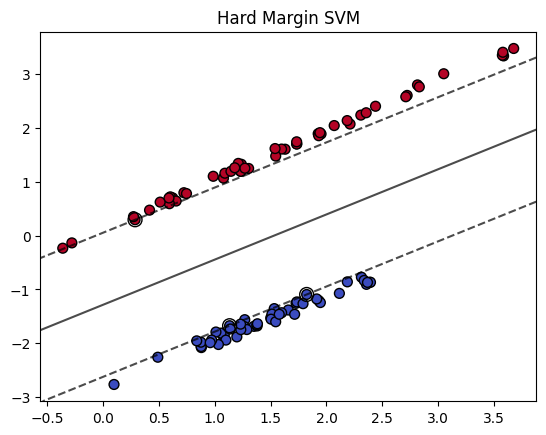

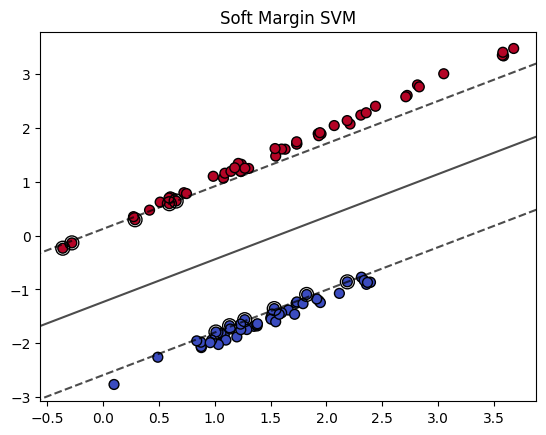

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.datasets import make_classification

def plot_svm(model, X, y, title):
    plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='coolwarm', edgecolors='k')

    # Plot the decision boundary
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # Create a mesh to plot the decision function
    xx = np.linspace(xlim[0], xlim[1], 50)
    yy = np.linspace(ylim[0], ylim[1], 50)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = model.decision_function(xy).reshape(XX.shape)

    # Plot the hyperplane
    ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.7,
               linestyles=['--', '-', '--'])

    # Highlight support vectors
    ax.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1],
               s=100, linewidth=1, facecolors='none', edgecolors='k')

    plt.title(title)
    plt.show()

# Generate synthetic data
X, y = make_classification(n_samples=100, n_features=2, n_informative=2,
                           n_redundant=0, n_clusters_per_class=1, class_sep=1.5,
                           random_state=42)

# Map labels from {0, 1} to {-1, 1} for SVM
y = np.where(y == 0, -1, 1)

# Hard margin SVM
hard_margin_svm = SVC(kernel='linear', C=1e10)  # High C approximates hard margin
hard_margin_svm.fit(X, y)
plot_svm(hard_margin_svm, X, y, "Hard Margin SVM")

# Soft margin SVM
soft_margin_svm = SVC(kernel='linear', C=0.1)  # Lower C allows a soft margin
soft_margin_svm.fit(X, y)
plot_svm(soft_margin_svm, X, y, "Soft Margin SVM")


**Q6. SVM Implementation through Iris dataset.**

Load the iris dataset from the scikit-learn library and split it into a training set and a testing setl

- Train a linear SVM classifier on the training set and predict the labels for the testing setl

- Compute the accuracy of the model on the testing setl

 - Plot the decision boundaries of the trained model using two of the featuresl

  - Try different values of the regularisation parameter C and see how it affects the performance of
the model.

In [2]:
import seaborn as sns

In [4]:
data=sns.load_dataset('iris')

In [5]:
X=data.iloc[:,:-1]
y=data.iloc[:,-1]

In [57]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [58]:
from sklearn.svm import SVC

In [59]:
svc=SVC(kernel='linear')

In [60]:
svc.fit(X_train,y_train)

SVC(kernel='linear')

In [61]:
svc.coef_

array([[-2.22483704,  2.22189431],
       [-2.00059415,  1.33307452],
       [-1.26936364, -0.95201355]])

In [62]:
## Prediction
y_pred=svc.predict(X_test)

In [63]:
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score

In [64]:
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.78      0.64      0.70        11
           2       0.71      0.83      0.77        12

    accuracy                           0.84        38
   macro avg       0.83      0.82      0.82        38
weighted avg       0.85      0.84      0.84        38

[[15  0  0]
 [ 0  7  4]
 [ 0  2 10]]
0.8421052631578947


In [65]:
print(accuracy_score(y_test,y_pred))

0.8421052631578947


In [66]:
import numpy as np

In [25]:
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data[:, :2]  # Select first two features for visualization
y = iris.target

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a linear SVM
svm = SVC(kernel='linear', C=1.0)
svm.fit(X_train, y_train)

SVC(kernel='linear')

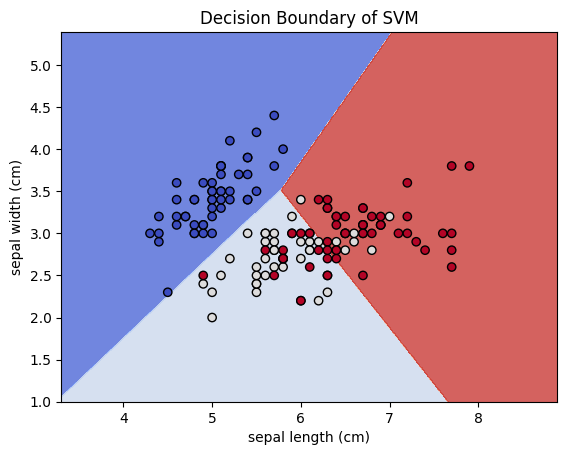

In [56]:
#Create a meshgrid
X=np.array(X)

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),np.arange(y_min, y_max, 0.01))

#Predict on the meshgrid points
Z = svm.predict(np.c_[xx.ravel(),yy.ravel()])
Z = Z.reshape(xx.shape)


#Plot decision boundaries
plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.coolwarm)
plt.scatter(X[:,0],X[:,1],c=y,edgecolors='k',cmap=plt.cm.coolwarm)
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.title("Decision Boundary of SVM")
plt.show()